In [292]:
import os
import tensorflow as tf
from sklearn.metrics import r2_score


In [293]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/siddharthbhaduri/Desktop/Work/Fall-2017/Google-Project/Week9


In [294]:
# Library Import
get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import shutil

# import the train test split
from sklearn.model_selection import train_test_split

# List to store results
# Stores the performance on test set.
model_results = []
model_name = []

# In[413]:


xf = pd.read_csv('input_model_weighted_average.csv')
xf.head()
xf.iloc[168:172]




,Unnamed: 0,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_HIGH,VIS_AVG,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM
168,168,2000,JAN,60.098523,24.919939,-5.750129,50.876803,18.079444,-19.152746,100.000000,...,11.091680,8.231682,0.061922,28.491682,9.674976,0.769395,4.527847,7.865567,3.129778,0.388589
169,169,2000,FEB,53.769218,31.870521,5.378496,44.864486,25.930720,-0.570920,100.000000,...,11.091680,7.687676,0.044134,28.925880,9.571381,287.022956,3.572751,4.803434,2.284139,0.385381
170,170,2000,MAY,84.325735,62.360525,37.698853,68.870647,51.653895,25.975416,98.988685,...,11.091680,8.828890,0.570830,30.201699,9.129810,4.098408,10.428558,0.000000,1.610892,4.896486
171,171,2000,JUN,88.622913,69.307943,52.228400,71.995094,60.166479,45.635832,99.068140,...,11.229015,9.513896,0.408795,27.953090,8.176592,3.466575,9.051719,0.000000,1.014093,4.340215


In [295]:
p_update = pd.read_csv('IL_Corn_Price_Updated_1986_2016.csv')
p_update['Period'] = pd.Categorical(p_update['Period'], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

p_update['Discounted_Value'] = p_update['Value'] /1.000248 
#ps
#Risk-free rate for 1986 - 2016 : 9.34% ( 30-year Treasury Constant Maturity Rate at 1986 )
# Monthly discount rate = 1/1.000248 

p_update = p_update[['Year', 'Period','Value', 'Discounted_Value']]
price_updated = p_update.dropna(axis=0, how='any')
#price_updated = p_update[p_update.Period != 'MARKETING YEAR']

price_updated = price_updated.sort_values(['Year', 'Period'])
price_updated = price_updated.reset_index(drop=True)
#price_updated.iloc[168:174]

price_updated = price_updated[~((price_updated.Year == 2000) & ((price_updated.Period == 'MAR') | (price_updated.Period == 'APR')))]
price_updated = price_updated.reset_index(drop=True)
price_updated.iloc[168:172]


xf['Price'] = price_updated['Value']
xf['Discounted_Price'] = price_updated['Discounted_Value']
xf['State'] = 'IL'

# Reorder State Column
cols = xf.columns.tolist()
#cols

cols.insert(1, cols.pop(cols.index('State')))

xf = xf.reindex(columns = cols)
#df.drop('Unnamed: 0', axis=1, inplace=True)

w_avg_model_scaled = xf
w_avg_model_scaled



,Unnamed: 0,State,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,Price,Discounted_Price
0,0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393
5,5,IL,1986,JUN,93.180721,71.263159,47.746898,67.021368,55.502022,33.450048,...,0.950015,25.666101,8.317023,10.598875,8.135348,0.000000,12.649299,4.995009,2.45,2.449393
6,6,IL,1986,JUL,93.651100,75.325134,57.224505,71.740380,60.440695,41.882198,...,0.360831,30.924584,7.668664,11.201697,9.899297,0.000000,12.561325,6.286502,2.04,2.039494
7,7,IL,1986,AUG,88.032940,68.355756,43.240501,70.470204,53.535626,34.387899,...,0.123844,23.558382,6.839216,1.162475,6.987723,0.000000,11.848591,1.872076,1.77,1.769561
8,8,IL,1986,SEP,86.350515,66.418060,39.848014,66.092621,53.110278,30.557896,...,0.061922,31.473925,7.953490,6.651649,12.019534,0.109089,13.926898,5.663013,1.52,1.519623
9,9,IL,1986,OCT,74.910045,52.914618,29.721084,61.366736,42.196248,24.559025,...,0.103207,25.729013,7.975400,10.803140,9.754228,0.327268,16.250392,1.152677,1.39,1.389655


In [296]:
w_group = w_avg_model_scaled.groupby(["YEAR"])
year_list = w_avg_model_scaled["YEAR"].drop_duplicates()

for year in year_list:
    temp_df = w_group.get_group(year)
    #print(str(year) + ": " +str(len(temp_df["PRICE"].dropna())))

print(w_group.get_group(2000))


     Unnamed: 0 State  YEAR MONTH   TMP_HIGH    TMP_AVG    TMP_LOW    DP_HIGH  \
168         168    IL  2000   JAN  60.098523  24.919939  -5.750129  50.876803   
169         169    IL  2000   FEB  53.769218  31.870521   5.378496  44.864486   
170         170    IL  2000   MAY  84.325735  62.360525  37.698853  68.870647   
171         171    IL  2000   JUN  88.622913  69.307943  52.228400  71.995094   
172         172    IL  2000   JUL  87.461845  70.466481  51.066055  74.704992   
173         173    IL  2000   AUG  89.361775  71.781012  56.695409  74.533066   
174         174    IL  2000   SEP  90.167238  63.849101  36.705700  71.408262   
175         175    IL  2000   OCT  81.999760  54.605762  25.520160  62.377842   
176         176    IL  2000   NOV  74.379046  37.371940   9.233327  59.321373   
177         177    IL  2000   DEC  45.127840  19.968293  -7.283182  37.862855   

        DP_AVG     DP_LOW        ...          VIS_LOW  WIND_HIGH  WIND_AVG  \
168  18.079444 -19.152746     

In [297]:
# List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

# Making all column names UPPER CASE --> inline with the weather data file
w_avg_model_scaled.columns = map(str.upper, w_avg_model_scaled.columns)

# rename UNNAMED:0 to INDEX
w_avg_model_scaled.rename(columns={'UNNAMED: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
w_avg_model_scaled = w_avg_model_scaled.drop('INDEX', axis=1)

w_avg_model_scaled.head()



,STATE,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,PRICE,DISCOUNTED_PRICE
0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393


In [298]:
w_avg_model_scaled.to_csv("final_input.csv")

In [299]:
col_names = list(w_avg_model_scaled)

# List all column types
#input_data.dtypes
print("Shape of Original data: {}".format(w_avg_model_scaled.shape) + "\n")

input_variables = w_avg_model_scaled.iloc[:,3:27]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")

#print(input_data.iloc[:,26])
price = w_avg_model_scaled.iloc[:,25]
discounted_price = w_avg_model_scaled.iloc[:,26]



Shape of Original data: (370, 27)

Variables: Index(['TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW',
       'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG',
       'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG',
       'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_FOG',
       'NUM_DAYS_THNDRSTRM', 'PRICE', 'DISCOUNTED_PRICE'],
      dtype='object')

Shape of variable data: (370, 24)



In [300]:
lnn =  pd.read_csv('final_input.csv')
#rename UNNAMED:0 to INDEX
lnn.rename(columns={'Unnamed: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
lnn = lnn.drop('INDEX', axis=1)
lnn.head()

,STATE,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,PRICE,DISCOUNTED_PRICE
0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393


In [301]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lstm_predictior_updated import lstm_model
#from lstm_predictior_updated import lstm_model, load_csvdata

import tensorflow as tf
from tensorflow.python.framework import dtypes
from tensorflow.contrib import learn as tflearn
from tensorflow.contrib import layers as tflayers
from tensorflow.contrib import rnn

from tensorflow.contrib.learn.python import SKCompat

LOG_DIR = ''
TIMESTEPS = 5
RNN_LAYERS = [{'num_units': 4}]
DENSE_LAYERS = [10, 10]
TRAINING_STEPS = 50000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 37


In [302]:
def rnn_data(data, time_steps, labels=False):
    """
    creates new data frame based on previous observation
      * example:
        l = [1, 2, 3, 4, 5]
        time_steps = 2
        -> labels == False [[1, 2], [2, 3], [3, 4]] #Data frame for input with 2 timesteps
        -> labels == True [3, 4, 5] # labels for predicting the next timestep
    """
    rnn_df = []
    for i in range(len(data) - time_steps):
        if labels:
            try:
                rnn_df.append(data.iloc[i + time_steps].as_matrix())
            except AttributeError:
                rnn_df.append(data.iloc[i + time_steps])
        else:
            data_ = data.iloc[i: i + time_steps].as_matrix()
            rnn_df.append(data_ if len(data_.shape) > 1 else [[i] for i in data_])

    return np.array(rnn_df, dtype=np.float32)



def split_data(data, val_size=0.1, test_size=0.1):
    """
    splits data to training, validation and testing parts
    """
    ntest = int(round(len(data) * (1 - test_size)))
    nval = int(round(len(data.iloc[:ntest]) * (1 - val_size)))

    df_train, df_val, df_test = data.iloc[:nval], data.iloc[nval:ntest], data.iloc[ntest:]

    return df_train, df_val, df_test



def prepare_data(data, time_steps, labels=False, val_size=0.1, test_size=0.1):
    """
    Given the number of `time_steps` and some data,
    prepares training, validation and test data for an lstm cell.
    """
    df_train, df_val, df_test = split_data(data, val_size, test_size)
    return (rnn_data(df_train, time_steps, labels=labels),
            rnn_data(df_val, time_steps, labels=labels),
            rnn_data(df_test, time_steps, labels=labels))

def load_csvdata(rawdata, unraw, time_steps, seperate=False):
    data = rawdata
    dataa = unraw

    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)
        
    if not isinstance(dataa, pd.DataFrame):
        dataa = pd.DataFrame(dataa)

    #train_x, val_x, test_x = prepare_data(data['a'] if seperate else data, time_steps)
    #train_y, val_y, test_y = prepare_data(data['b'] if seperate else dataa, time_steps, labels=True)
    
    train_x, val_x, test_x = prepare_data(data, time_steps)
    train_y, val_y, test_y = prepare_data(dataa, time_steps, labels=True)
    return dict(train=train_x, val=val_x, test=test_x), dict(train=train_y, val=val_y, test=test_y)

def generate_data(fct, x, time_steps, seperate=False):
    """generates data with based on a function fct"""
    data = fct(x)
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)
    train_x, val_x, test_x = prepare_data(data['a'] if seperate else data, time_steps)
    train_y, val_y, test_y = prepare_data(data['b'] if seperate else data, time_steps, labels=True)
    return dict(train=train_x, val=val_x, test=test_x), dict(train=train_y, val=val_y, test=test_y)

In [303]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y %H:%M')

#rawdata = pd.read_csv("/Users/siddharthbhaduri/Desktop/Work/Fall-2017/Google-Project/Week9/RealMarketPriceDataPT.csv", 
#                  parse_dates={'timeline': ['date', '(UTC)']}, 
#                   index_col='timeline', date_parser=dateparse)
r_data = lnn.iloc[:,3:25]
un_data = lnn.iloc[:,26]

X, y = load_csvdata(rawdata = r_data, unraw = un_data, time_steps = TIMESTEPS, seperate=False)



In [304]:

regressor = SKCompat(learn.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS),))

validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                     every_n_steps=PRINT_STEPS,
                                                     early_stopping_rounds=1000)
print(X['train'])
print(y['train'])


5
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x121876518>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/qm/ssr8wzks7cj5449yqx9mtkhr0000gn/T/tmpvcfqjzpq'}
Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.
[[[ 55.95365906  27.61721611  -2.98092484 ...,   7.58473778   9.70704174
     0.        ]
  [ 53.83888626  28.73111153   0.35363761 ...,   9.23127747  15.20332813
     0.6584565 ]
  [ 77.66845

In [305]:
#regressor.fit(X['train'], y['train'], monitors=[validation_monitor])

regressor.fit(X['train'], y['train'],
              monitors=[validation_monitor],
              batch_size=BATCH_SIZE,
              steps=TRAINING_STEPS)

print("TEST:")
print (X['test'])
print (y['test'])


predicted = regressor.predict(X['test'])


rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/qm/ssr8wzks7cj5449yqx9mtkhr0000gn/T/tmpvcfqjzpq/model.ckpt.
INFO:tensorflow:loss = 2.20029, step = 1
INFO:tensorflow:global_step/sec: 242.806
INFO:tensorflow:loss = 0.634493, step = 101 (0.413 sec)
INFO:tensorflow:global_step/sec: 256.097
INFO:tensorflow:loss = 0.794609, step = 201 (0.390 sec)
INFO:tensorflow:global_step/sec: 258.202
INFO:tensorflow:loss = 0.531353, step = 301 (0.387 sec)
INFO:tensorflow:global_step/sec: 285.873
INFO:tensorflow:loss = 0.882455, step = 401 (0.350 sec)
INFO:tensorflow:global_step/sec: 252.596
INFO:tensorflow:loss = 0.402585, step = 501 (0.396 sec)
INFO:ten

Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Starting evaluation at 2017-11-09-02:18:10
INFO:tensorflow:Restoring parameters from /var/folders/qm/ssr8wzks7cj5449yqx9mtkhr0000gn/T/tmpvcfqjzpq/model.ckpt-1
INFO:tensorflow:Finished evaluation at 2017-11-09-02:18:10
INFO:tensorflow:Saving dict for global step 1: global_step = 1, loss = 17.8152
INFO:tensorflow:Validation (step 5000): loss = 17.8152, global_step = 1
INFO:tensorflow:global_step/sec: 24.4292
INFO:tensorflow:loss = 0.539327, step = 5001 (4.094 sec)
INFO:tensorflow:global_step/sec: 255.137
INFO:tensorflow:loss = 0.445459, step = 5101 (0.392 sec)
INFO:tensorflow:global_step/sec: 250.287
INFO:tensorflow:loss = 0.664003, step = 5201 (0.399 sec)
INFO:tensorflow:global_step/sec: 254.866
INFO:tensorflow:loss = 0.446332, step = 5301 (0.392 sec)
INFO:tensorflow:global_step/sec: 251.603
INFO:tensorflow:loss = 0.706117, step = 5401 (0.397 sec)
INFO:tensorflow:global_step/sec: 251.208
INFO:tensorflow:loss = 0.

INFO:tensorflow:loss = 0.5776, step = 12601 (0.500 sec)
INFO:tensorflow:global_step/sec: 232.113
INFO:tensorflow:loss = 1.0246, step = 12701 (0.432 sec)
INFO:tensorflow:global_step/sec: 246.194
INFO:tensorflow:loss = 0.456644, step = 12801 (0.406 sec)
INFO:tensorflow:global_step/sec: 260.622
INFO:tensorflow:loss = 0.497331, step = 12901 (0.383 sec)
INFO:tensorflow:global_step/sec: 229.276
INFO:tensorflow:loss = 0.655147, step = 13001 (0.437 sec)
INFO:tensorflow:global_step/sec: 243.209
INFO:tensorflow:loss = 0.53614, step = 13101 (0.412 sec)
INFO:tensorflow:global_step/sec: 242.089
INFO:tensorflow:loss = 0.40142, step = 13201 (0.412 sec)
INFO:tensorflow:global_step/sec: 245.75
INFO:tensorflow:loss = 0.978905, step = 13301 (0.407 sec)
INFO:tensorflow:global_step/sec: 228.778
INFO:tensorflow:loss = 0.926362, step = 13401 (0.438 sec)
INFO:tensorflow:global_step/sec: 243.498
INFO:tensorflow:loss = 0.486307, step = 13501 (0.409 sec)
INFO:tensorflow:global_step/sec: 248.988
INFO:tensorflow:l

INFO:tensorflow:global_step/sec: 266.577
INFO:tensorflow:loss = 0.676544, step = 21001 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.5
INFO:tensorflow:loss = 0.694752, step = 21101 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.527
INFO:tensorflow:loss = 1.31003, step = 21201 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.056
INFO:tensorflow:loss = 0.394899, step = 21301 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.077
INFO:tensorflow:loss = 0.382128, step = 21401 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.806
INFO:tensorflow:loss = 0.484739, step = 21501 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.416
INFO:tensorflow:loss = 0.592366, step = 21601 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.114
INFO:tensorflow:loss = 0.454789, step = 21701 (0.379 sec)
INFO:tensorflow:global_step/sec: 269.795
INFO:tensorflow:loss = 0.738466, step = 21801 (0.371 sec)
INFO:tensorflow:global_step/sec: 262.043
INFO:tensorflow:loss = 0.652862, step = 21901 (0.382 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 266.121
INFO:tensorflow:loss = 1.00564, step = 29301 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.311
INFO:tensorflow:loss = 0.447664, step = 29401 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.94
INFO:tensorflow:loss = 0.977106, step = 29501 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.232
INFO:tensorflow:loss = 0.481638, step = 29601 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.804
INFO:tensorflow:loss = 0.546448, step = 29701 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.84
INFO:tensorflow:loss = 0.795682, step = 29801 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.521
INFO:tensorflow:loss = 0.946715, step = 29901 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.66
INFO:tensorflow:loss = 0.628856, step = 30001 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.1
INFO:tensorflow:loss = 0.553241, step = 30101 (0.379 sec)
INFO:tensorflow:global_step/sec: 267.488
INFO:tensorflow:loss = 0.35084, step = 30201 (0.374 sec)
INFO:tensorflow:g

INFO:tensorflow:loss = 0.514687, step = 37601 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.23
INFO:tensorflow:loss = 0.622732, step = 37701 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.653
INFO:tensorflow:loss = 0.473422, step = 37801 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.751
INFO:tensorflow:loss = 0.61438, step = 37901 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.605
INFO:tensorflow:loss = 0.36326, step = 38001 (0.375 sec)
INFO:tensorflow:global_step/sec: 268.066
INFO:tensorflow:loss = 0.612443, step = 38101 (0.373 sec)
INFO:tensorflow:global_step/sec: 254.046
INFO:tensorflow:loss = 0.403074, step = 38201 (0.394 sec)
INFO:tensorflow:global_step/sec: 259.093
INFO:tensorflow:loss = 0.848704, step = 38301 (0.386 sec)
INFO:tensorflow:global_step/sec: 265.842
INFO:tensorflow:loss = 0.804724, step = 38401 (0.376 sec)
INFO:tensorflow:global_step/sec: 239.278
INFO:tensorflow:loss = 0.714613, step = 38501 (0.418 sec)
INFO:tensorflow:global_step/sec: 227.235
INFO:tensorfl

INFO:tensorflow:global_step/sec: 328.795
INFO:tensorflow:loss = 0.375162, step = 46001 (0.304 sec)
INFO:tensorflow:global_step/sec: 266.951
INFO:tensorflow:loss = 0.787092, step = 46101 (0.376 sec)
INFO:tensorflow:global_step/sec: 267.427
INFO:tensorflow:loss = 0.470732, step = 46201 (0.373 sec)
INFO:tensorflow:global_step/sec: 259.812
INFO:tensorflow:loss = 0.681167, step = 46301 (0.385 sec)
INFO:tensorflow:global_step/sec: 256.485
INFO:tensorflow:loss = 0.678334, step = 46401 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.626
INFO:tensorflow:loss = 0.685659, step = 46501 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.358
INFO:tensorflow:loss = 0.459774, step = 46601 (0.395 sec)
INFO:tensorflow:global_step/sec: 250.544
INFO:tensorflow:loss = 0.409014, step = 46701 (0.399 sec)
INFO:tensorflow:global_step/sec: 255.099
INFO:tensorflow:loss = 0.363749, step = 46801 (0.392 sec)
INFO:tensorflow:global_step/sec: 248.871
INFO:tensorflow:loss = 0.680546, step = 46901 (0.402 sec)
INFO:tenso

Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Restoring parameters from /var/folders/qm/ssr8wzks7cj5449yqx9mtkhr0000gn/T/tmpvcfqjzpq/model.ckpt-50000
MSE: 1.261535


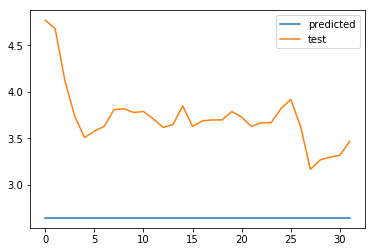

In [306]:

plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])
plt.show()



In [307]:
print(y['test'])

[[ 4.76881742]
 [ 4.67883968]
 [ 4.1189785 ]
 [ 3.7390728 ]
 [ 3.50912976]
 [ 3.57911229]
 [ 3.62910008]
 [ 3.80905533]
 [ 3.81905293]
 [ 3.77906275]
 [ 3.78906035]
 [ 3.70908022]
 [ 3.61910248]
 [ 3.64909506]
 [ 3.84904552]
 [ 3.62910008]
 [ 3.68908501]
 [ 3.69908261]
 [ 3.69908261]
 [ 3.78906035]
 [ 3.72907519]
 [ 3.62910008]
 [ 3.66909003]
 [ 3.66909003]
 [ 3.81905293]
 [ 3.91902804]
 [ 3.62910008]
 [ 3.16921401]
 [ 3.26918936]
 [ 3.2991817 ]
 [ 3.31917691]
 [ 3.46913958]]


In [308]:
print(predicted)

[ 2.64688134  2.64688134  2.64688158  2.64688134  2.64688134  2.64688134
  2.64688134  2.64688134  2.64688134  2.64688158  2.64688134  2.64688158
  2.64688134  2.64688158  2.64688158  2.64688134  2.64688134  2.64688134
  2.64688134  2.64688134  2.64688134  2.64688134  2.64688134  2.64688134
  2.64688134  2.64688134  2.64688134  2.64688134  2.64688134  2.64688134
  2.64688134  2.64688134]


In [309]:
r2_score(y['test'], predicted)

-11.223681361102944